In [38]:
%matplotlib inline
import ipyparallel as ipp
rc = ipp.Client()
rc.ids

[0, 1]

     ENL Estimation
Sun Jul 26 13:14:00 2020
infile:  /media/nfs_share/southyorkshire/T20191002.tif
Dual polarimetry
filtering...
row: 100 200 300 
Mode: 5.594500


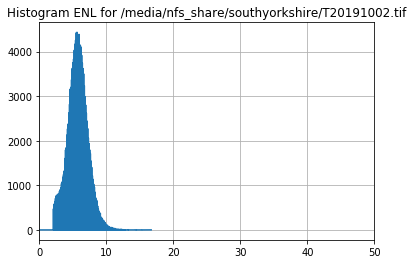

elapsed time: 15.102786540985107


In [62]:
run auxil/enlml -d [1500,1500,400,400] /media/nfs_share/southyorkshire/T20191002.tif

In [39]:
!scripts/run_sar_seqQ.sh /media/nfs_share/radarsat2bonn/ 12 0.05 rs2bonn.tif [100,100,400,400]

Spatial/spectral subsetting
Wed Jul 29 16:52:17 2020
Input /media/nfs_share/radarsat2bonn/T20090525.tif
elapsed time: 0.29929423332214355
 
attempting parallel execution of co-registration ...
available engines [0, 1]
elapsed time for co-registration: 25.798670053482056
     Multi-temporal SAR Change Detection
Wed Jul 29 16:52:43 2020
First (reference) filename:  /media/nfs_share/radarsat2bonn/T20090525_sub.tif
number of images: 12
equivalent number of looks: 12.000000
significance level: 0.050000
Quad polarization
pre-calculating Rj and p-values ...
attempting parallel calculation ...
available engines [0, 1]
ell =  1 2 3 4 5 6 7 8 9 10 11 
elapsed time for p-value calculation: 11.524263620376587
last change map written to: /media/nfs_share/radarsat2bonn/rs2bonn_cmap.tif
frequency map written to: /media/nfs_share/radarsat2bonn/rs2bonn_fmap.tif
bitemporal map image written to: /media/nfs_share/radarsat2bonn/rs2bonn_bmap.tif
first change map written to: /media/nfs_share/radarsat2bonn/rs

In [40]:
ls /media/nfs_share/radarsat2bonn

rs2bonn_atsf_thresh.tif  T20090712_warp.tif  T20100707_warp.tif
rs2bonn_atsf.tif         T20090805.tif       T20100731.tif
rs2bonn_avimglog.tif     T20090805_warp.tif  T20100731_warp.tif
rs2bonn_bmap.tif         T20090829.tif       T20100824.tif
rs2bonn_cmap.tif         T20090829_warp.tif  T20100824_warp.tif
rs2bonn_fmap.tif         T20091016.tif       T20101011_atsflog.tif
rs2bonn_smap.tif         T20091016_warp.tif  T20101011_atsf.tif
T20090525_sub.tif        T20100426.tif       T20101011.tif
T20090525.tif            T20100426_warp.tif  T20101011_warp_gamma.tif
T20090618.tif            T20100520.tif       T20101011_warp_mmse.tif
T20090618_warp.tif       T20100520_warp.tif  T20101011_warp.tif
T20090712.tif            T20100707.tif


In [41]:
run scripts/mmse_filter /media/nfs_share/radarsat2bonn/T20101011_warp.tif 12

       MMSE_FILTER
Wed Jul 29 16:53:40 2020
infile:  /media/nfs_share/radarsat2bonn/T20101011_warp.tif
number of looks: 12.000000
Determining filter weights from span image
row: 
100 
200 
300 
 done
Filtering covariance matrix elements
band: 1
band: 2
band: 3
band: 4
band: 5
band: 6
band: 7
band: 8
band: 9
result written to: /media/nfs_share/radarsat2bonn/T20101011_warp_mmse.tif
elapsed time: 73.48248338699341


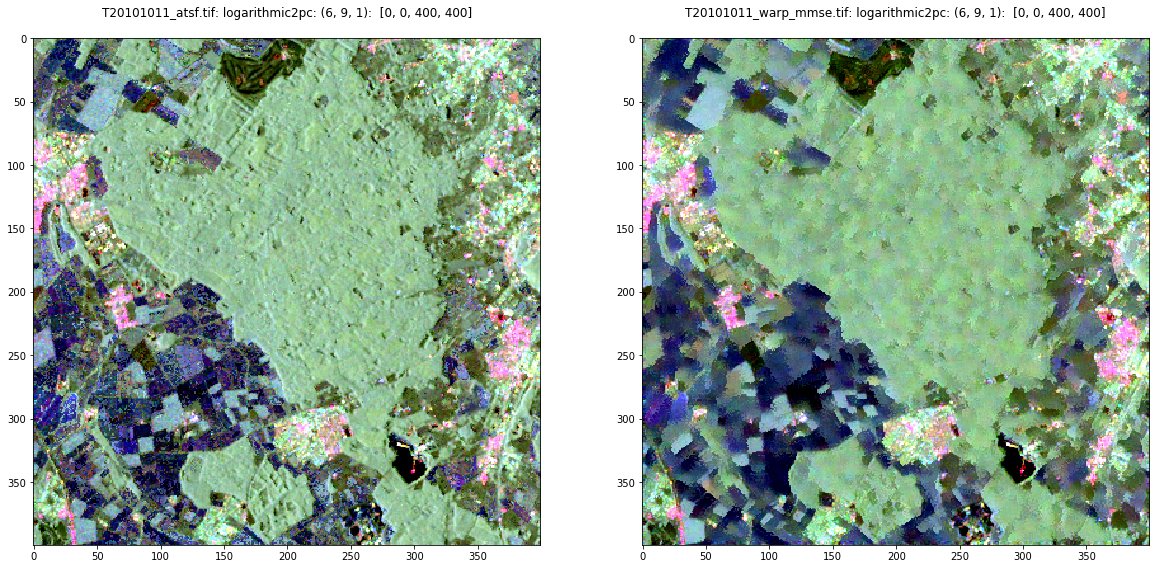

In [45]:
%run scripts/dispms -f /media/nfs_share/radarsat2bonn/T20101011_atsf.tif -p [6,9,1] \
-F /media/nfs_share/radarsat2bonn/T20101011_warp_mmse.tif -P [6,9,1]

In [43]:
%run scripts/atsfthreshold -t 6 /media/nfs_share/radarsat2bonn/T20101011_atsf.tif \
/media/nfs_share/radarsat2bonn/T20101011_warp_mmse.tif \
/media/nfs_share/radarsat2bonn/T20101011_atsflog.tif

Replacing /media/nfs_share/radarsat2bonn/T20101011_atsf.tif with /media/nfs_share/radarsat2bonn/T20101011_warp_mmse.tif under threshold
result written to: /media/nfs_share/radarsat2bonn/T20101011_atsf_thresh.tif


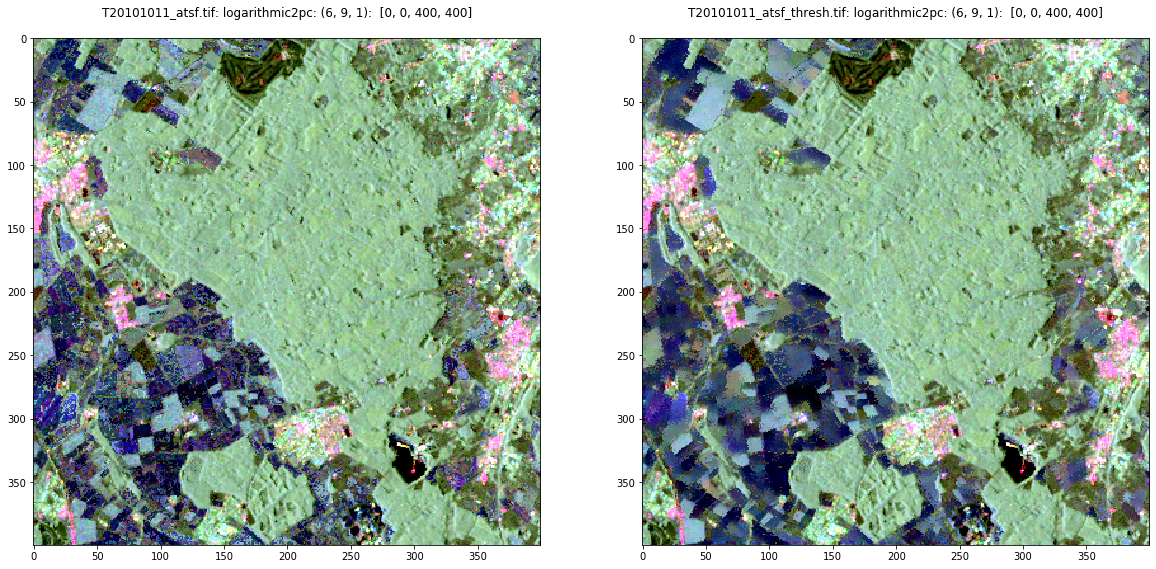

In [46]:
%run scripts/dispms -f /media/nfs_share/radarsat2bonn/T20101011_atsf.tif -p [6,9,1] \
-F /media/nfs_share/radarsat2bonn/T20101011_atsf_thresh.tif -P [6,9,1]